# Linear Regression and Correlation

## Challenge 1

You are the owner of a big company and you suspect that the younger your employees are, the most likely it is that they don't come to work. In order to prove this hypothesis, you have gathered some data:

| EmployeeID | Age | Absences |
|--------|-----|------------|
| 1      | 27  | 15         |
| 2      | 61  | 6          |
| 3      | 37  | 10         |
| 4      | 23  | 18         |
| 5      | 46  |  9         |
| 6      | 58  |  7         |
| 7      | 29  | 14         |
| 8      | 36  | 11         |
| 9      | 64  |  5         |
| 10     | 40  |  8         |

You can find this information in the `data` folder of the present repository. 

Import the necessary libraries to complete the lab here:

In [2]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Plot the scatter chart of `Age` and `Absences`. Comment the result. Do you see any relation between `Age` and `Absences`?

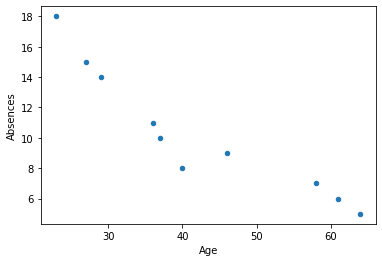

In [15]:
# your code here
df = pd.read_csv('../data/absences.csv')
df.plot(x ='Age', y='Absences', kind = 'scatter')

In [ ]:
# your comments here
# There seems to be a strong negative correlation between age and absences. 

#### 2.- Define a function to calculate the slope and intercept of the regression line for two variables. Your are not allowed to use any functions or methods that directly calculate those parameters.

In [60]:
# your code here

def slope_intercept(x, y):
    correlation = (1/(x.size - 1))*(((x - x.mean())*(y - y.mean())).sum()/(x.std()*y.std()))
    slope = correlation*(y.std()/x.std())
    intercept = y.mean() - (slope*x.mean())
    return intercept, slope


#### 3.- Use the function you defined in step 2 to calculate the regression line for `Age` and `Absences`. Plot it and comment your results.

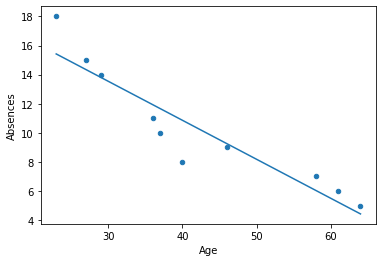

In [63]:
# your code here
b, m = slope_intercept(df['Age'], df['Absences'])
f = lambda x : m*x + b
x = np.array([df.Age.min(), df.Age.max()])
df.plot(x ='Age', y='Absences', kind = 'scatter')
plt.plot(x,f(x))

In [ ]:
# your comments here
# The records in the [35-40] range differ from the linear regression far more than the rest of the sample.

#### 4.- Define a function to calculate the covariance and the correlation of two variables.

In [66]:
# your code here
def covar_corr (x, y):
    covariance = (1/(x.size - 1))*(((x - x.mean())*(y - y.mean())).sum())
    correlation = covariance/(x.std()*y.std())
    return covariance, correlation


#### 5.- Use the function you defined in step 4 to calculate the covariance and the correlation of `Age` and `Absences`. Compare them and comment.

In [67]:
# your code here
cov, corr = covar_corr(df['Age'], df['Absences'])
print('The covariance is', cov)
print('The correlation is', corr)

The covariance is -57.69999999999999
The correlation is -0.9325434092481011


In [ ]:
# your comments here
#The covariance is a value that shows the relationship between the variances of two variables. We can extract some information
#from the fact that it is negative or positive, but we can't use it for comparative purposes, hence the correlation index,
#which normalizes the covariance on a number ranged from -1 to 1.

#### 6.- Summarize your results, interpret them and give some insights. Can you confirm that the age is an indicator of absenteeism?

In [ ]:
# your comments here
#The results show a negative correlation between age and absences, where most values match a clear linear regression.
#Though that indicates that there is a relation between the values, this relation is not necessarily a cause-effect relation.
#Therefore, we may consider age as an indicator of absentism, but not as its cause.

## Challenge 2

Good Ironhackers stay in campus on Fridays for Ironbeers. You suspect that the more people you tell to stay, the most likely it is that they don't. You want to know if you are the reason why people don't stay so you decide to do an analysis. 

X is the number of people that you told to stay and Y is the number of people that actually stayed.

| X | Y |
|---|---|
| 1 | 1 |
| 3 | 2 |
| 4 | 4 |
| 6 | 4 |
| 8 | 5 |
| 9 | 7 |
| 11 |8 |
| 14 | 9 |

Use the following command to create a dataframe with the data about Ironbeers attendance:

In [68]:
ironbeers_df = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,9]})

#### 1.- Calculate the covariance and the correlation of `X` and `Y`. Comment on the results.

In [75]:
# your code here
cov2 = ironbeers_df.cov().loc['X','Y']
corr2 = ironbeers_df.corr().loc['X','Y']
print('The covariance is', cov2)
print('The correlation is', corr2)

The covariance is 12.0
The correlation is 0.9770084209183943


In [ ]:
# your comments here
#The assumption seems to be wrong, as the correlation between both variables is positive: the more people you tell, the more
#people that actually stayed

#### 2.- Plot the scatter chart of `X` and `Y`. Comment on the results.

Text(0, 0.5, 'actually stayed')

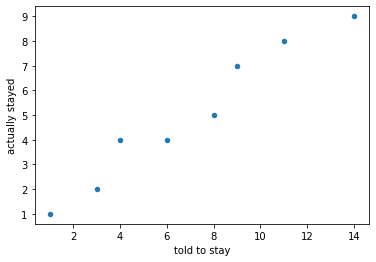

In [78]:
# your code here
ironbeers_df.plot(x ='X', y='Y', kind = 'scatter')
plt.xlabel('told to stay')
plt.ylabel('actually stayed')

In [ ]:
# your comments here
#The plot indeed confirms the comment above

#### 3.- Calculate the regression line for `X` and `Y`. Commment on the results.

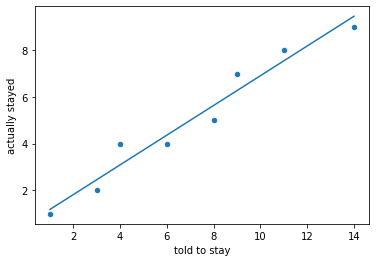

In [82]:
# your code here
b, m = slope_intercept(ironbeers_df['X'], ironbeers_df['Y'])
f = lambda x : m*x + b
x = np.array([ironbeers_df.X.min(), ironbeers_df.X.max()])
ironbeers_df.plot(x ='X', y='Y', kind = 'scatter')
plt.xlabel('told to stay')
plt.ylabel('actually stayed')
plt.plot(x,f(x))



In [ ]:
# your comments here
# The regression line fits the distribution almost perfectly

#### 4.- What is your conclusion? Are you the reason why people is not staying on Fridays?

In [ ]:
# your comments here
# Not at all!

## Bonus Challenge: Error Analysis

You are going to do an analysis to check whether two random variables fit into a linear regression or not.

In this challenge, you are asked to do an error analysis using the data in **challenge 2**. An "error" is the difference between the expected value of an observation (the regression line value) and the actual value.

#### 1.- First create a new column `expected_Y` in `ironbeers_df` to store the expected `Y` value for each `X`.
**Hint**: You get the expected `Y` by evaluating the regression line for each `X`.

In [ ]:
# your code here

#### 2.- Create a new column `error` in `ironbeers_df` to store the error between the actual and expected values of `Y`. Plot the scatter chart of `X` and `error`.

In [ ]:
# your code here

#### 3.- The closer the points to zero, the best the actual values fit the linear regression. Comment the plot above. Do you see any particular points with a high error?

In [ ]:
# your comments here

#### 4.- Remove the points with a high error and recalculate the regression line.

In [ ]:
# your code here

#### 5.- Calculate the correlation. What is happening? Comment the result.

In [ ]:
# your code here

In [ ]:
# your comments here